# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
com=pd.read_csv('/content/Company_Data.csv')

# **EDA**

In [ ]:
com.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [ ]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
com.shape

(400, 11)

In [ ]:
com.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# dummy cols for better unserstanding

In [ ]:
com1=pd.get_dummies(com,columns=['Urban','US'],drop_first=True)

In [ ]:
com1['ShelveLoc']=com1['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [ ]:
com1.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
5,10.81,124,113,13,501,72,3,78,16,0,1


# **Visualization**

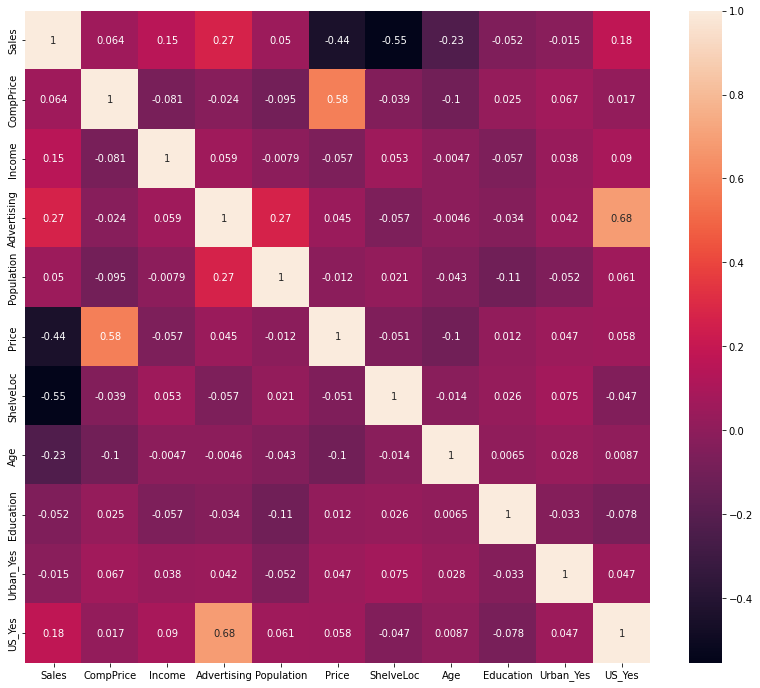

In [ ]:
 plt.subplots(figsize=(14,12))
sns.heatmap(com1.corr(),annot=True)


In [ ]:
iu=pd.crosstab(com1['Age'],com1['Urban_Yes'])

In [ ]:
iu

Urban_Yes,0,1
Age,,
25,2,7
26,4,4
27,4,2
28,0,7
29,3,4
30,3,3
31,2,1
32,2,4
33,1,7


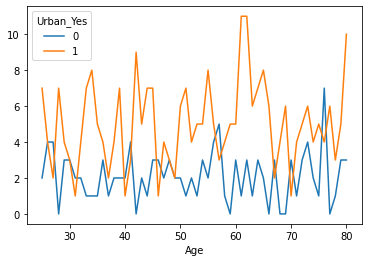

In [ ]:
iu.plot()

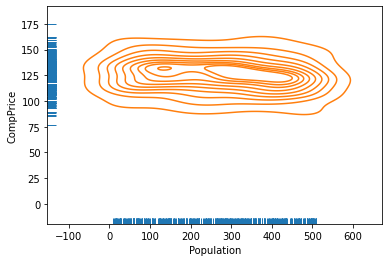

In [ ]:
sns.rugplot(data=com1,x=com1['Population'],y=com1['CompPrice'])
sns.kdeplot(data=com1,x=com1['Population'],y=com1['CompPrice'])

In [ ]:
ps=pd.crosstab(com1['Age'],com1['ShelveLoc'])

In [ ]:
ps

ShelveLoc,1,2,3
Age,,,
25,1,6,2
26,1,4,3
27,1,4,1
28,2,1,4
29,3,3,1
30,2,3,1
31,2,0,1
32,1,4,1
33,1,3,4


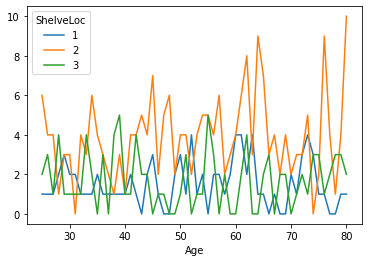

In [ ]:
ps.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


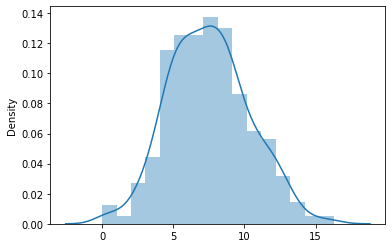

In [ ]:
sns.distplot(x=com1['Sales'])

In [ ]:
com1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [238]:
com1['Sales'] = label_encoder.fit_transform(com1['Sales'])

In [239]:
x=com1.drop('Sales',axis=1)

In [240]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [241]:
y=com1['Sales']

In [242]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [243]:
#TRAINING AND TESTING THE DATASET
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [244]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
85,125,103,0,304,112,2,49,13,0,0
69,127,59,0,339,99,2,65,12,1,0
203,131,82,0,132,157,3,25,14,1,0
379,125,111,0,404,107,3,54,15,1,0
261,121,42,4,188,118,2,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1,1
165,147,58,7,100,191,3,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


In [245]:
y_train

85     2
69     2
203    1
379    1
261    1
      ..
306    1
165    1
7      2
219    2
326    1
Name: Sales, Length: 320, dtype: int64

# **decision-tree**

In [246]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

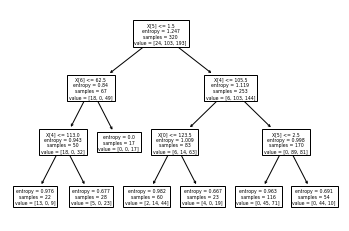

In [247]:
tree.plot_tree(model);

In [248]:
y_train.value_counts().keys()

Int64Index([2, 1, 0], dtype='int64')

In [249]:
com1.Sales.value_counts()

2    243
1    130
0     27
Name: Sales, dtype: int64

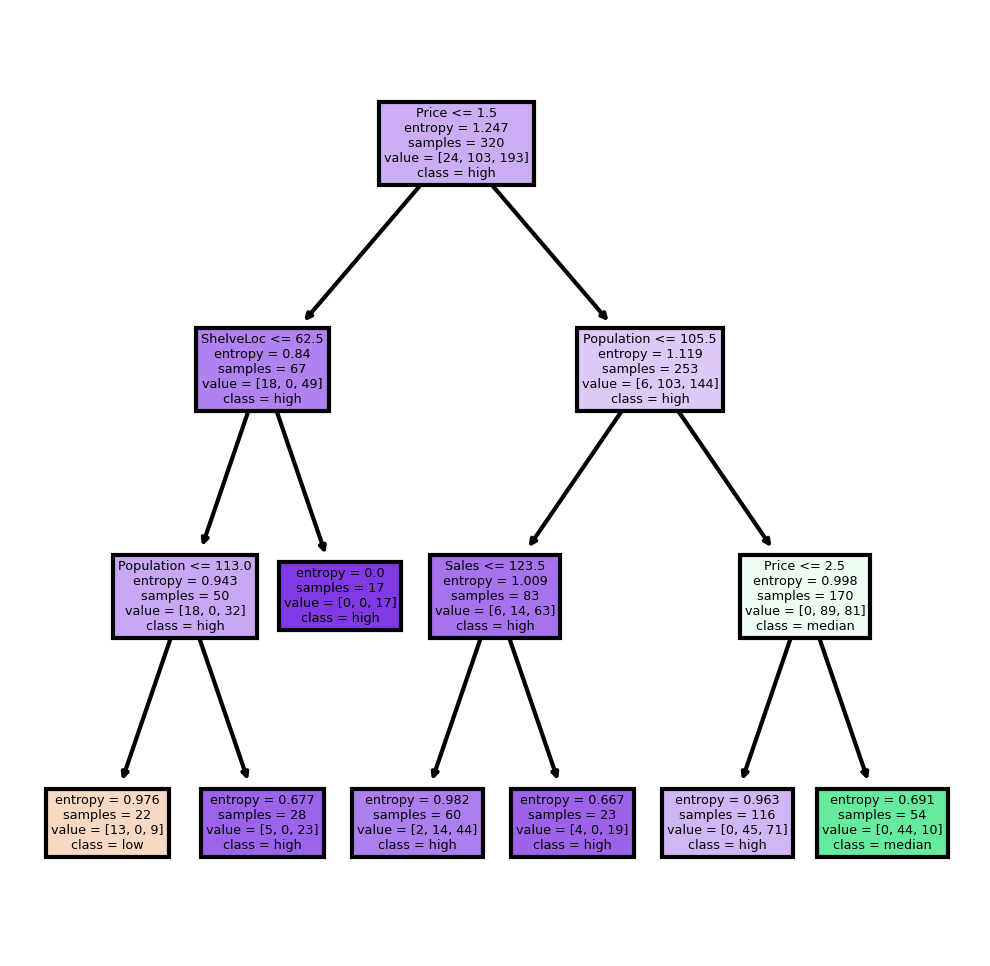

In [250]:
fn=com1.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

**classification**

In [251]:
preds=model.predict(x_test)

In [254]:
pd.Series(preds).value_counts()

2    69
1     7
0     4
dtype: int64

In [253]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [255]:
pd.crosstab(y_test,preds) 

col_0,0,1,2
Sales,,,
0,2,0,1
1,0,5,22
2,2,2,46


In [256]:
#model accuracy
np.mean(preds==y_test)

0.6625